# Logistic Regression 

In [1]:
# Import necessary libraries for data manipulation, model training, and visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import import_ipynb  # Used for importing Jupyter notebooks as modules
import seaborn as sns
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

c:\Users\47476\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [8]:
# Import dataset preprocessing module
from preprocess import df  # Assuming 'preprocess.ipynb' contains preprocessing steps and loads the dataset into 'df'

# Display the first few rows of the dataframe to get an overview of the data
print(df.head())

    Startposisjon bredde  Startposisjon lengde  Havdybde start  Varighet  \
17                74.931                15.785          -443.0     243.0   
20                67.826                12.967           -71.0      72.0   
26                69.744                16.516         -1090.0     881.0   
32                72.866                29.105          -298.0     900.0   
37                59.385                 0.562          -124.0     233.0   

    Stopposisjon bredde  Stopposisjon lengde  Havdybde stopp  Trekkavstand  \
17               74.926               15.894          -358.0        3214.0   
20               67.829               12.933           -54.0        1471.0   
26               69.744               16.516         -1090.0           0.0   
32               72.868               29.114          -293.0         371.0   
37               59.186                0.626          -130.0       22467.0   

    Redskap FDIR (kode)  Hovedart FAO Art - FDIR  Rundvekt  Bredde  \
17  

In [3]:
# Selecting features and the target variable for the classification task
features = [
    'Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Varighet',
    'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 
    'Redskap FDIR (kode)', 'Rundvekt', 'Month'
]
X = df[features]  # Input features
y = df['Hovedart FAO']  # Target variable for prediction

In [4]:
# Scaling the features for logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#legg til validation
# legg til 3 modeller med ulike paramtere
# pipeline
# normaliozation



# Creating and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test)

In [5]:
# Evaluating the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.791647544745296
              precision    recall  f1-score   support

           0       0.78      0.90      0.83      5030
           1       0.82      0.65      0.72      3686

    accuracy                           0.79      8716
   macro avg       0.80      0.77      0.78      8716
weighted avg       0.80      0.79      0.79      8716



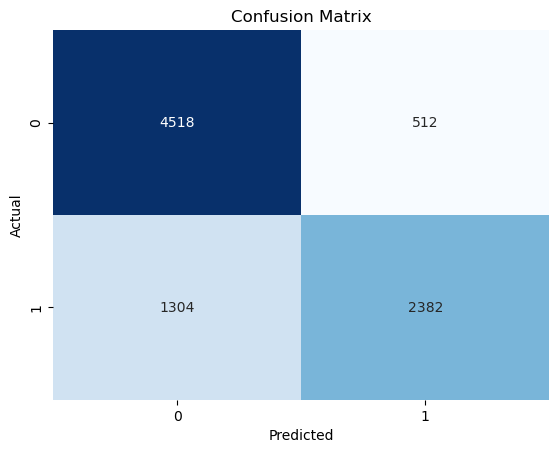

In [6]:
# Compute the confusion matrix to evaluate the accuracy of a classification
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap for better interpretability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  # 'cbar=False' disables the color bar
plt.xlabel('Predicted')  # Label for the x-axis
plt.ylabel('Actual')  # Label for the y-axis
plt.title('Confusion Matrix')  # Title for the heatmap
plt.show()

Pipeline: Streamlines preprocessing and modeling steps, ensuring that transformations are applied consistently during both training and evaluation.
GridSearchCV: Automates the process of hyperparameter tuning and selects the best model configuration based on cross-validation performance. It also ensures your model is not just tuned to a specific subset of your data.
Normalization included in Pipeline: Ensures that feature scaling (standardization) is properly integrated into the model training process, avoiding data leakage and ensuring that the same scaling is applied to both training and test data.

c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best parameters found: {'model__C': 1, 'model__solver': 'saga'}
Accuracy on test set: 0.791877007801744
              precision    recall  f1-score   support

           0       0.78      0.90      0.83      5030
           1       0.82      0.65      0.72      3686

    accuracy                           0.79      8716
   macro avg       0.80      0.77      0.78      8716
weighted avg       0.80      0.79      0.79      8716



c:\Users\47476\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


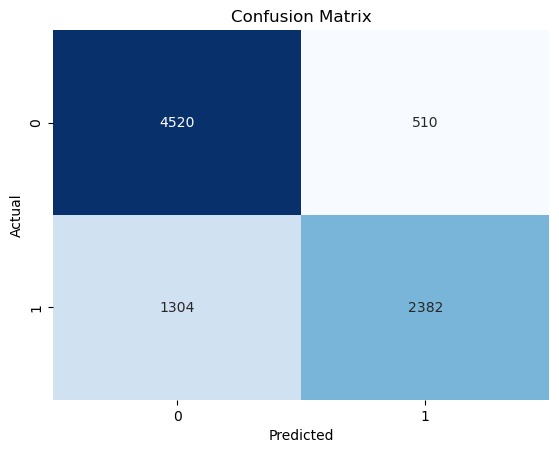

In [9]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

# Define a grid of parameters to search (if desired)
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__solver': ['liblinear', 'saga']  # Example hyperparameters
}

# Setup grid search
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Train the model using grid search
grid.fit(X_train, y_train)

# Making predictions
y_pred = grid.predict(X_test)

# Evaluate the model
print("Best parameters found:", grid.best_params_)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Compute and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Model Configuration and Regularization Strategy

#### Parameter Selection for Logistic Regression

For the logistic regression model employed in our analysis, parameter selection was guided by the following principles:

1. **Initial Simplicity**: Given logistic regression's efficiency and simplicity for binary and linearly separable classification tasks, the model was initiated with sklearn's default parameters. This approach facilitates establishing a robust baseline without immediately delving into extensive hyperparameter optimization.

2. **Solver and Regularization Choice**: By default, sklearn's `LogisticRegression` uses the 'lbfgs' solver, which is well-suited for small to medium-sized datasets. This solver automatically incorporates L2 regularization, a method that penalizes the square of coefficient magnitudes to mitigate overfitting by encouraging smaller, more generalized model coefficients.

#### Regularization Techniques

The use of regularization techniques is crucial in preventing overfitting, ensuring the model's generalizability to unseen data. Our logistic regression model utilizes L2 regularization by default, as detailed below:

- **L2 Regularization**: Integral to the 'lbfgs' solver, L2 regularization adds a penalty term to the loss function proportional to the square of the magnitude of coefficients. This regularization form is known for its effectiveness in creating simpler models that generalize better to new data by discouraging large coefficients.

- **Adjusting Regularization Strength**: Although the model was initially configured with default regularization strength (`C=1.0`), the `C` parameter in `LogisticRegression` offers the flexibility to modify this strength inversely. Lower values of `C` increase the regularization effect, further reducing the risk of overfitting, especially in datasets with high dimensionality or when the model exhibits signs of overfitting.

### Conclusion

The logistic regression model's parameterization, rooted in simplicity and guided by the principles of effective regularization, lays a foundation for a solid baseline model. This approach underscores the balance between model complexity and the ability to generalize, with L2 regularization playing a pivotal role in model robustness. Future iterations of the model could explore hyperparameter tuning, including adjustments to the regularization strength (`C`), to refine performance and address specific characteristics of the dataset.
